In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Testing the dataset 
path_single = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2.h5"
path_single_mask = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2.h5"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


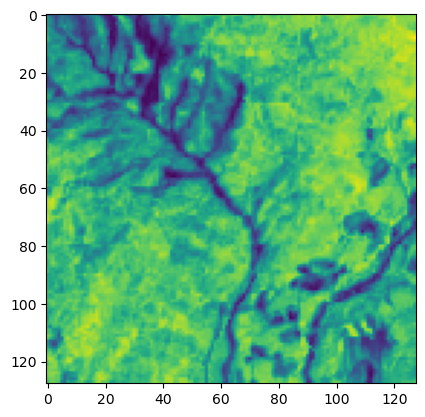

In [3]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


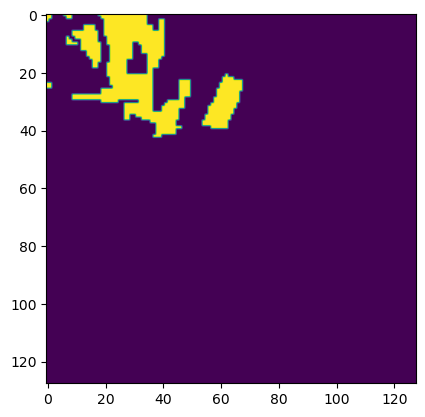

In [4]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [5]:
path_single = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1.h5"
path_single_mask = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1.h5"
TRAIN_PATH = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\*.h5"
TRAIN_MASK = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [6]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1.h5
1 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_10.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_10.h5
2 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_100.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_100.h5
3 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1000.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1000.h5
4 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1001.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1001.h5
5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1002.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1002.h5
6 C:\shared doc\subjects\6th

57 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_105.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_105.h5
58 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1050.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1050.h5
59 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1051.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1051.h5
60 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1052.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1052.h5
61 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1053.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1053.h5
62 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1054.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1054.h5
63 C:\shared

107 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1095.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1095.h5
108 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1096.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1096.h5
109 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1097.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1097.h5
110 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1098.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1098.h5
111 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1099.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1099.h5
112 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_11.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_11.h5
113 C:\s

159 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1141.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1141.h5
160 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1142.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1142.h5
161 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1143.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1143.h5
162 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1144.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1144.h5
163 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1145.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1145.h5
164 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1146.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1146.h5
165 

216 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1193.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1193.h5
217 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1194.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1194.h5
218 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1195.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1195.h5
219 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1196.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1196.h5
220 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1197.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1197.h5
221 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1198.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1198.h5
222 

275 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1246.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1246.h5
276 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1247.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1247.h5
277 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1248.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1248.h5
278 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1249.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1249.h5
279 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_125.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_125.h5
280 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1250.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1250.h5
281 C:

334 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_13.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_13.h5
335 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_130.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_130.h5
336 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1300.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1300.h5
337 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1301.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1301.h5
338 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1302.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1302.h5
339 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1303.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1303.h5
340 C:\sha

393 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1352.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1352.h5
394 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1353.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1353.h5
395 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1354.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1354.h5
396 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1355.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1355.h5
397 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1356.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1356.h5
398 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1357.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1357.h5
399 

445 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_14.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_14.h5
446 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_140.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_140.h5
447 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1400.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1400.h5
448 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1401.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1401.h5
449 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1402.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1402.h5
450 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1403.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1403.h5
451 C:\sha

505 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1453.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1453.h5
506 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1454.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1454.h5
507 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1455.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1455.h5
508 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1456.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1456.h5
509 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1457.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1457.h5
510 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1458.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1458.h5
511 

563 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1505.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1505.h5
564 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1506.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1506.h5
565 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1507.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1507.h5
566 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1508.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1508.h5
567 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1509.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1509.h5
568 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_151.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_151.h5
569 C:

618 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1555.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1555.h5
619 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1556.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1556.h5
620 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1557.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1557.h5
621 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1558.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1558.h5
622 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1559.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1559.h5
623 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_156.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_156.h5
624 C:

674 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1605.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1605.h5
675 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1606.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1606.h5
676 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1607.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1607.h5
677 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1608.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1608.h5
678 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1609.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1609.h5
679 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_161.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_161.h5
680 C:

725 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1651.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1651.h5
726 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1652.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1652.h5
727 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1653.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1653.h5
728 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1654.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1654.h5
729 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1655.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1655.h5
730 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1656.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1656.h5
731 

781 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1701.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1701.h5
782 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1702.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1702.h5
783 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1703.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1703.h5
784 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1704.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1704.h5
785 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1705.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1705.h5
786 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1706.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1706.h5
787 

837 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1752.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1752.h5
838 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1753.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1753.h5
839 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1754.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1754.h5
840 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1755.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1755.h5
841 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1756.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1756.h5
842 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1757.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1757.h5
843 

887 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1798.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1798.h5
888 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1799.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1799.h5
889 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_18.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_18.h5
890 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_180.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_180.h5
891 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1800.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1800.h5
892 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1801.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1801.h5
893 C:\sha

942 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1847.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1847.h5
943 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1848.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1848.h5
944 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1849.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1849.h5
945 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_185.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_185.h5
946 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1850.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1850.h5
947 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1851.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1851.h5
948 C:

995 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1895.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1895.h5
996 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1896.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1896.h5
997 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1897.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1897.h5
998 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1898.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1898.h5
999 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1899.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1899.h5
1000 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_19.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_19.h5
1001 C:

1045 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_194.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_194.h5
1046 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1940.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1940.h5
1047 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1941.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1941.h5
1048 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1942.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1942.h5
1049 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1943.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1943.h5
1050 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1944.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1944.h5


1100 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_199.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_199.h5
1101 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1990.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1990.h5
1102 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1991.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1991.h5
1103 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1992.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1992.h5
1104 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1993.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1993.h5
1105 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1994.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1994.h5


1152 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2035.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2035.h5
1153 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2036.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2036.h5
1154 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2037.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2037.h5
1155 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2038.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2038.h5
1156 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2039.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2039.h5
1157 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_204.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_204.h5


1203 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2081.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2081.h5
1204 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2082.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2082.h5
1205 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2083.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2083.h5
1206 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2084.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2084.h5
1207 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2085.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2085.h5
1208 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2086.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2086.h

1255 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2128.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2128.h5
1256 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2129.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2129.h5
1257 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_213.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_213.h5
1258 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2130.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2130.h5
1259 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2131.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2131.h5
1260 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2132.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2132.h5


1310 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2178.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2178.h5
1311 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2179.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2179.h5
1312 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_218.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_218.h5
1313 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2180.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2180.h5
1314 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2181.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2181.h5
1315 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2182.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2182.h5


1366 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2228.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2228.h5
1367 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2229.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2229.h5
1368 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_223.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_223.h5
1369 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2230.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2230.h5
1370 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2231.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2231.h5
1371 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2232.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2232.h5


1426 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2282.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2282.h5
1427 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2283.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2283.h5
1428 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2284.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2284.h5
1429 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2285.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2285.h5
1430 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2286.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2286.h5
1431 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2287.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2287.h

1479 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_233.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_233.h5
1480 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2330.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2330.h5
1481 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2331.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2331.h5
1482 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2332.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2332.h5
1483 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2333.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2333.h5
1484 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2334.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2334.h5


1533 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2379.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2379.h5
1534 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_238.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_238.h5
1535 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2380.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2380.h5
1536 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2381.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2381.h5
1537 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2382.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2382.h5
1538 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2383.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2383.h5


1587 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2427.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2427.h5
1588 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2428.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2428.h5
1589 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2429.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2429.h5
1590 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_243.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_243.h5
1591 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2430.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2430.h5
1592 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2431.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2431.h5


1641 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2476.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2476.h5
1642 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2477.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2477.h5
1643 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2478.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2478.h5
1644 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2479.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2479.h5
1645 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_248.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_248.h5
1646 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2480.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2480.h5


C:\Users\nigel\AppData\Local\Temp\ipykernel_23520\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1675 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2506.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2506.h5
1676 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2507.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2507.h5
1677 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2508.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2508.h5
1678 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2509.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2509.h5
1679 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_251.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_251.h5
1680 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2510.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2510.h5


1731 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2557.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2557.h5
1732 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2558.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2558.h5
1733 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2559.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2559.h5
1734 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_256.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_256.h5
1735 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2560.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2560.h5
1736 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2561.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2561.h5


1788 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2608.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2608.h5
1789 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2609.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2609.h5
1790 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_261.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_261.h5
1791 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2610.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2610.h5
1792 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2611.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2611.h5
1793 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2612.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2612.h5


1843 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2658.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2658.h5
1844 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2659.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2659.h5
1845 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_266.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_266.h5
1846 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2660.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2660.h5
1847 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2661.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2661.h5
1848 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2662.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2662.h5


1894 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2703.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2703.h5
1895 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2704.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2704.h5
1896 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2705.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2705.h5
1897 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2706.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2706.h5
1898 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2707.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2707.h5
1899 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2708.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2708.h

1946 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2750.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2750.h5
1947 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2751.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2751.h5
1948 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2752.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2752.h5
1949 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2753.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2753.h5
1950 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2754.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2754.h5
1951 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2755.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2755.h

1999 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2799.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2799.h5
2000 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_28.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_28.h5
2001 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_280.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_280.h5
2002 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2800.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2800.h5
2003 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2801.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2801.h5
2004 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2802.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2802.h5
2005

2050 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2844.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2844.h5
2051 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2845.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2845.h5
2052 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2846.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2846.h5
2053 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2847.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2847.h5
2054 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2848.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2848.h5
2055 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2849.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2849.h

2105 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2894.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2894.h5
2106 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2895.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2895.h5
2107 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2896.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2896.h5
2108 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2897.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2897.h5
2109 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2898.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2898.h5
2110 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2899.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2899.h

2161 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2944.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2944.h5
2162 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2945.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2945.h5
2163 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2946.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2946.h5
2164 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2947.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2947.h5
2165 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2948.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2948.h5
2166 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2949.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2949.h

2219 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2997.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2997.h5
2220 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2998.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2998.h5
2221 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2999.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2999.h5
2222 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3.h5
2223 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_30.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_30.h5
2224 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_300.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_300.h5
2225 C:\sh

C:\Users\nigel\AppData\Local\Temp\ipykernel_23520\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2268 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_304.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_304.h5
2269 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3040.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3040.h5
2270 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3041.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3041.h5
2271 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3042.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3042.h5
2272 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3043.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3043.h5
2273 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3044.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3044.h5


2328 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3094.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3094.h5
2329 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3095.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3095.h5
2330 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3096.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3096.h5
2331 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3097.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3097.h5
2332 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3098.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3098.h5
2333 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3099.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3099.h

2390 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_315.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_315.h5
2391 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3150.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3150.h5
2392 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3151.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3151.h5
2393 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3152.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3152.h5
2394 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3153.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3153.h5
2395 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3154.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3154.h5


2442 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3197.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3197.h5
2443 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3198.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3198.h5
2444 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3199.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3199.h5
2445 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_32.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_32.h5
2446 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_320.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_320.h5
2447 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3200.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3200.h5
2448

2503 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3251.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3251.h5
2504 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3252.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3252.h5
2505 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3253.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3253.h5
2506 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3254.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3254.h5
2507 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3255.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3255.h5
2508 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3256.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3256.h

2557 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_330.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_330.h5
2558 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3300.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3300.h5
2559 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3301.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3301.h5
2560 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3302.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3302.h5
2561 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3303.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3303.h5
2562 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3304.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3304.h5


2616 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3353.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3353.h5
2617 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3354.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3354.h5
2618 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3355.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3355.h5
2619 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3356.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3356.h5
2620 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3357.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3357.h5
2621 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3358.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3358.h

2677 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3408.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3408.h5
2678 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3409.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3409.h5
2679 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_341.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_341.h5
2680 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3410.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3410.h5
2681 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3411.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3411.h5
2682 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3412.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3412.h5


2738 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3463.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3463.h5
2739 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3464.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3464.h5
2740 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3465.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3465.h5
2741 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3466.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3466.h5
2742 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3467.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3467.h5
2743 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3468.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3468.h

2794 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3513.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3513.h5
2795 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3514.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3514.h5
2796 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3515.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3515.h5
2797 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3516.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3516.h5
2798 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3517.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3517.h5
2799 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3518.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3518.h

2850 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3564.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3564.h5
2851 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3565.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3565.h5
2852 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3566.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3566.h5
2853 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3567.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3567.h5
2854 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3568.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3568.h5
2855 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3569.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3569.h

2904 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3612.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3612.h5
2905 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3613.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3613.h5
2906 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3614.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3614.h5
2907 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3615.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3615.h5
2908 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3616.h5
2909 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3617.h

2955 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3659.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3659.h5
2956 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_366.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_366.h5
2957 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3660.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3660.h5
2958 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3661.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3661.h5
2959 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3662.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3662.h5
2960 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3663.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3663.h5


3005 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3703.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3703.h5
3006 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3704.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3704.h5
3007 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3705.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3705.h5
3008 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3706.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3706.h5
3009 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3707.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3707.h5
3010 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3708.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3708.h

3065 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3758.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3758.h5
3066 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3759.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3759.h5
3067 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_376.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_376.h5
3068 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3760.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3760.h5
3069 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3761.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3761.h5
3070 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3762.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3762.h5


3117 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_385.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_385.h5
3118 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_386.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_386.h5
3119 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_387.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_387.h5
3120 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_388.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_388.h5
3121 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_389.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_389.h5
3122 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_39.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_39.h5
3123 C:\shar

3169 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_431.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_431.h5
3170 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_432.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_432.h5
3171 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_433.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_433.h5
3172 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_434.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_434.h5
3173 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_435.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_435.h5
3174 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_436.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_436.h5
3175 C:\sh

3221 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_479.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_479.h5
3222 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_48.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_48.h5
3223 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_480.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_480.h5
3224 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_481.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_481.h5
3225 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_482.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_482.h5
3226 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_483.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_483.h5
3227 C:\shar

3271 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_523.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_523.h5
3272 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_524.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_524.h5
3273 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_525.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_525.h5
3274 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_526.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_526.h5
3275 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_527.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_527.h5
3276 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_528.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_528.h5
3277 C:\sh

3324 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_571.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_571.h5
3325 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_572.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_572.h5
3326 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_573.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_573.h5
3327 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_574.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_574.h5
3328 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_575.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_575.h5
3329 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_576.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_576.h5
3330 C:\sh

3374 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_616.h5
3375 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_617.h5
3376 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_618.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_618.h5
3377 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_619.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_619.h5
3378 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_62.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_62.h5
3379 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_620.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_620.h5
3380 C:\shar

3425 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_662.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_662.h5
3426 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_663.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_663.h5
3427 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_664.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_664.h5
3428 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_665.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_665.h5
3429 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_666.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_666.h5
3430 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_667.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_667.h5
3431 C:\sh

3482 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_713.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_713.h5
3483 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_714.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_714.h5
3484 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_715.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_715.h5
3485 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_716.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_716.h5
3486 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_717.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_717.h5
3487 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_718.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_718.h5
3488 C:\sh

3534 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_760.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_760.h5
3535 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_761.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_761.h5
3536 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_762.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_762.h5
3537 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_763.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_763.h5
3538 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_764.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_764.h5
3539 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_765.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_765.h5
3540 C:\sh

3592 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_812.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_812.h5
3593 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_813.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_813.h5
3594 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_814.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_814.h5
3595 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_815.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_815.h5
3596 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_816.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_816.h5
3597 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_817.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_817.h5
3598 C:\sh

3643 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_859.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_859.h5
3644 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_86.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_86.h5
3645 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_860.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_860.h5
3646 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_861.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_861.h5
3647 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_862.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_862.h5
3648 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_863.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_863.h5
3649 C:\shar

3704 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_913.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_913.h5
3705 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_914.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_914.h5
3706 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_915.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_915.h5
3707 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_916.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_916.h5
3708 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_917.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_917.h5
3709 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_918.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_918.h5
3710 C:\sh

3758 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_962.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_962.h5
3759 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_963.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_963.h5
3760 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_964.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_964.h5
3761 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_965.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_965.h5
3762 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_966.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_966.h5
3763 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_967.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_967.h5
3764 C:\sh

In [7]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


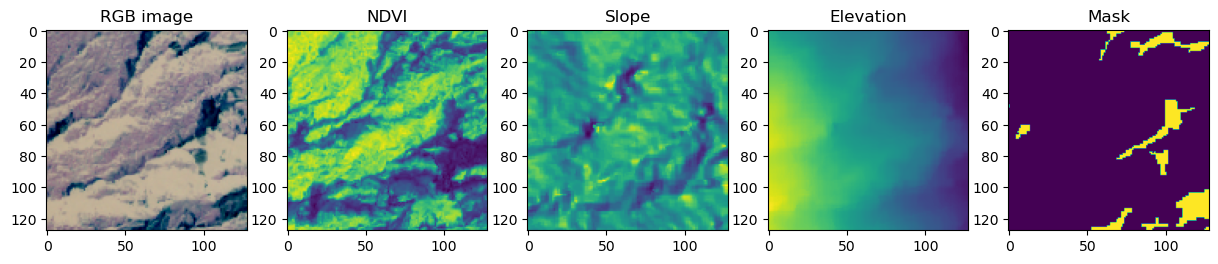

In [9]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into train (60%) and temp (40%)
x_train, x_temp, y_train, y_temp = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.4, shuffle=True)

# Split the temp data into validation (50%) and test (50%)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True)

# Now x_train, x_valid, x_test, y_train, y_valid, y_test are split as desired


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


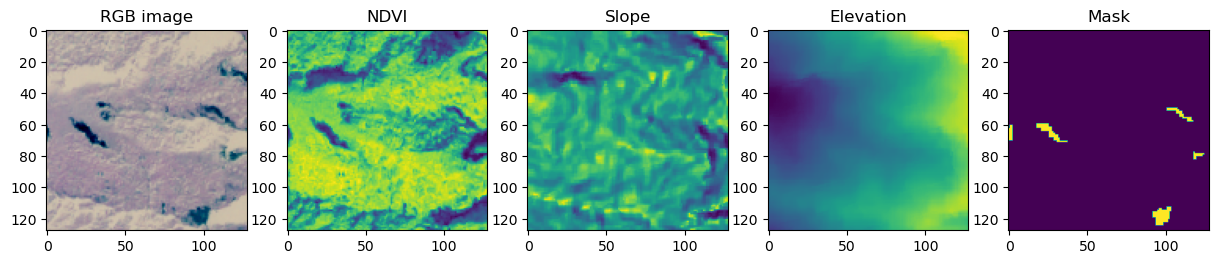

In [11]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


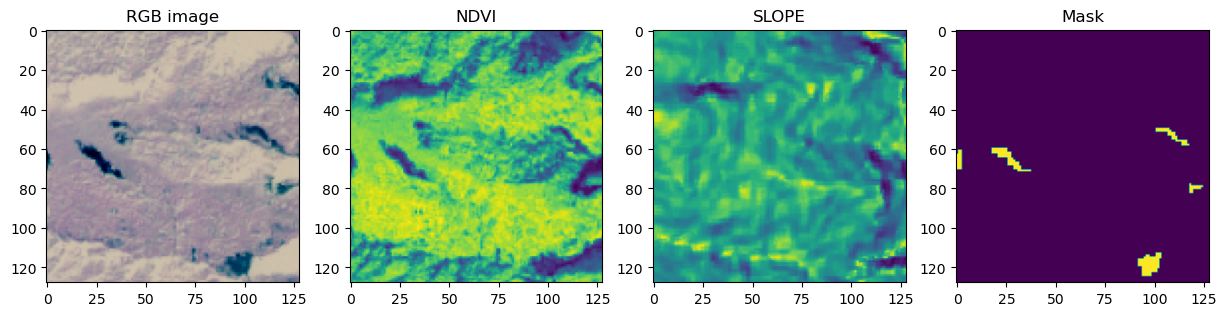

In [14]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [15]:
import sys
sys.path.append(r"C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\utils\utils.py")

In [16]:
from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [17]:

model = unet_model(128, 128, 6)
# model.summary()

# ModelCheckpoint to save the best model based on validation performance
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    r"C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model.h5.keras",
    monitor="val_f1_m",  # You might need to define the metric function 'f1_m' for this
    verbose=1,
    save_best_only=True,
    mode="max"
)

# List of callbacks
callbacks = [
    checkpointer
]

# Train the model on train and validation data
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=40,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)




Epoch 1/40

Epoch 1: val_f1_m improved from -inf to 0.29941, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model.h5.keras
143/143 - 68s - 476ms/step - accuracy: 0.9701 - f1_m: 0.0492 - loss: 0.0910 - precision_m: 0.3217 - recall_m: 0.0349 - val_accuracy: 0.9803 - val_f1_m: 0.2994 - val_loss: 0.0522 - val_precision_m: 0.8028 - val_recall_m: 0.1903
Epoch 2/40

Epoch 2: val_f1_m improved from 0.29941 to 0.59923, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model.h5.keras
143/143 - 63s - 442ms/step - accuracy: 0.9827 - f1_m: 0.5247 - loss: 0.0470 - precision_m: 0.7052 - recall_m: 0.4539 - val_accuracy: 0.9847 - val_f1_m: 0.5992 - val_loss: 0.0404 - val_precision_m: 0.7262 - val_recall_m: 0.5208
Epoch 3/40

Epoch 3: val_f1_m improved from 0.59923 to 0.64799, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\la

Epoch 26/40

Epoch 26: val_f1_m improved from 0.69616 to 0.71059, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model.h5.keras
143/143 - 117s - 819ms/step - accuracy: 0.9879 - f1_m: 0.6868 - loss: 0.0305 - precision_m: 0.7957 - recall_m: 0.6150 - val_accuracy: 0.9875 - val_f1_m: 0.7106 - val_loss: 0.0312 - val_precision_m: 0.7246 - val_recall_m: 0.7041
Epoch 27/40

Epoch 27: val_f1_m did not improve from 0.71059
143/143 - 116s - 814ms/step - accuracy: 0.9883 - f1_m: 0.7019 - loss: 0.0295 - precision_m: 0.8007 - recall_m: 0.6320 - val_accuracy: 0.9882 - val_f1_m: 0.7006 - val_loss: 0.0299 - val_precision_m: 0.7872 - val_recall_m: 0.6376
Epoch 28/40

Epoch 28: val_f1_m did not improve from 0.71059
143/143 - 116s - 815ms/step - accuracy: 0.9881 - f1_m: 0.6893 - loss: 0.0301 - precision_m: 0.7941 - recall_m: 0.6206 - val_accuracy: 0.9878 - val_f1_m: 0.6840 - val_loss: 0.0303 - val_precision_m: 0.7916 - va

ValueError: too many values to unpack (expected 2)

In [18]:

# Save the model
model.save("model_save.h5")

In [19]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.029797961935400963 0.9882999658584595 0.7212555408477783 0.7752872109413147 0.676310122013092


In [22]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / union
    return iou

# Evaluate on test set
loss = model.evaluate(x_test, y_test, verbose=2)

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to binary arrays
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(np.uint8)
y_test_binary = y_test.astype(np.uint8)

# Calculate precision, recall, f1_score for each class
precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
f1_score_val = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')

# Calculate IOU (Intersection over Union)
iou = calculate_iou(y_test_binary.flatten(), y_pred_binary.flatten())

print("Test Metrics:")
print("Loss:", loss)
print("F1 Score:", f1_score_val)
print("Precision:", precision)
print("Recall:", recall)
print("IOU:", iou)


24/24 - 11s - 440ms/step - accuracy: 0.9883 - f1_m: 0.7161 - loss: 0.0305 - precision_m: 0.7688 - recall_m: 0.6739
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step
Test Metrics:
Loss: [0.030492333695292473, 0.9882747530937195, 0.7161406874656677, 0.768757164478302, 0.6739256381988525]
F1 Score: 0.9878888930787025
Precision: 0.987661951438394
Recall: 0.9882747449372944
IOU: 0.5756623690665799


In [30]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve

def calculate_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / union
    return iou

# Evaluate on test set (assuming model has already been trained)
loss = model.evaluate(x_test, y_test, verbose=2)

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to binary arrays
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(np.uint8)
y_test_binary = y_test.astype(np.uint8)

# Calculate precision, recall, f1_score for each class
precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
f1_score_val = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')

# Calculate IOU (Intersection over Union)
iou = calculate_iou(y_test_binary.flatten(), y_pred_binary.flatten())

# Calculate Mean Average Precision (mAP)
# Assuming y_test_binary and y_pred_binary are in the right shape for mAP calculation
n_classes = y_test.shape[-1]  # Number of classes
average_precisions = []
for i in range(n_classes):
    average_precisions.append(average_precision_score(y_test_binary[:, :, i].flatten(), y_pred_binary[:, :, i].flatten()))

mAP = np.mean(average_precisions)

print("Test Metrics:")
print("Loss:", loss)
print("F1 Score:", f1_score_val)
print("Precision:", precision)
print("Recall:", recall)
print("IOU:", iou)
print("mAP:", mAP)


24/24 - 10s - 433ms/step - accuracy: 0.9883 - f1_m: 0.7161 - loss: 0.0305 - precision_m: 0.7688 - recall_m: 0.6739
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step
Test Metrics:
Loss: [0.030492333695292473, 0.9882747530937195, 0.7161406874656677, 0.768757164478302, 0.6739256381988525]
F1 Score: 0.9878888930787025
Precision: 0.987661951438394
Recall: 0.9882747449372944
IOU: 0.5756623690665799
mAP: 0.47527029999990494


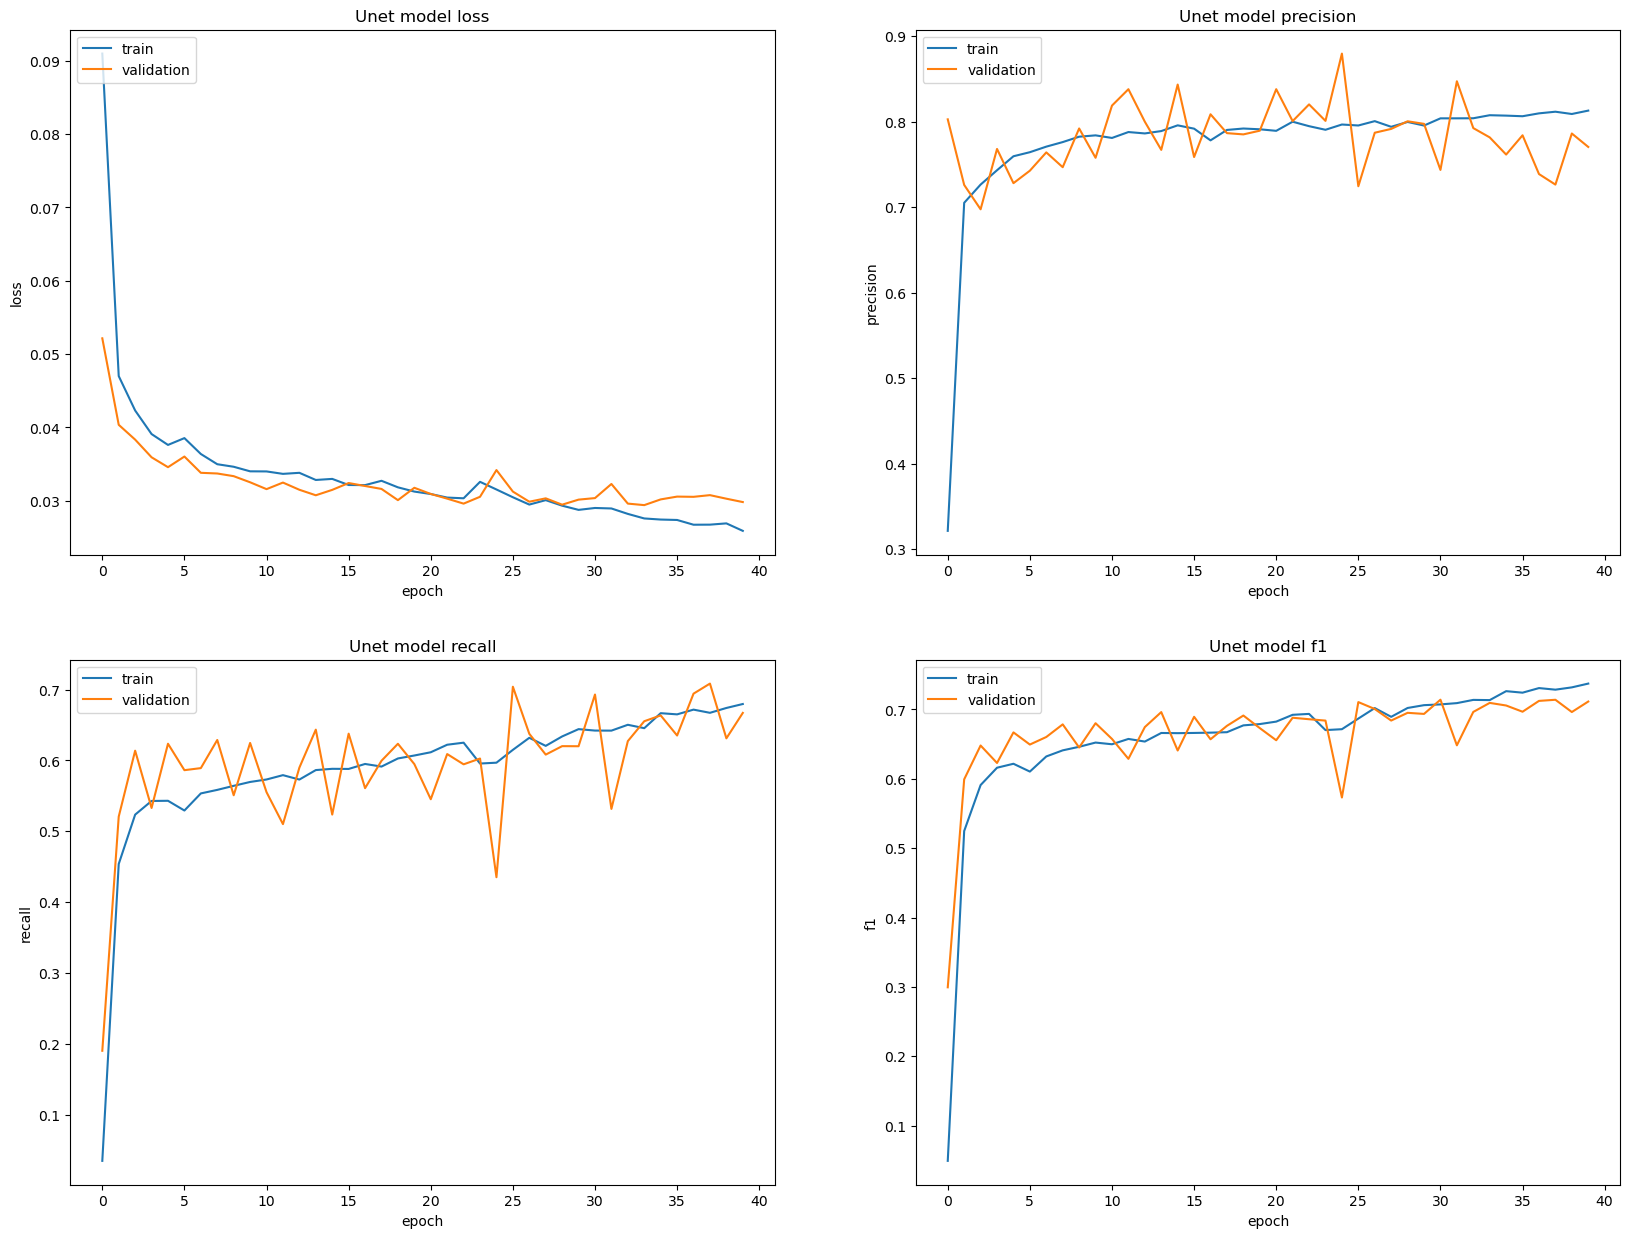

In [23]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [24]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step


Text(0.5, 1.0, 'Training Image')

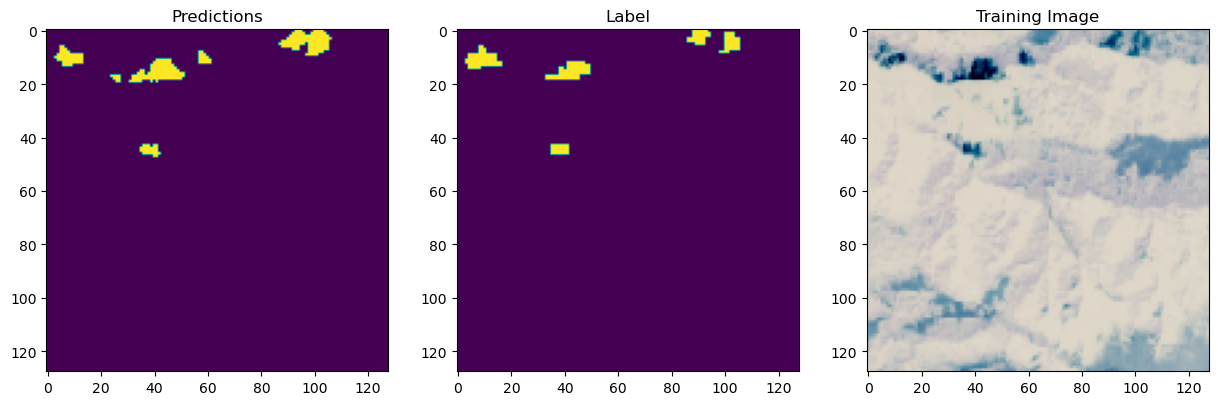

In [26]:
img = 138
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [27]:
validation_url = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\*.h5"
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_1.h5
1 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_10.h5
2 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_100.h5
3 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_101.h5
4 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_102.h5
5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_103.h5
6 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_104.h5
7 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_105.h5
8 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_106.h5
9 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_107.h5
10 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_108.h5
11 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_109.h5
12 C:\shared doc\

102 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_191.h5
103 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_192.h5
104 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_193.h5
105 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_194.h5
106 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_195.h5
107 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_196.h5
108 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_197.h5
109 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_198.h5
110 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_199.h5
111 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_2.h5
112 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_20.h5
113 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_20

C:\Users\nigel\AppData\Local\Temp\ipykernel_23520\2114873646.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


166 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_28.h5
167 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_29.h5
168 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_3.h5
169 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_30.h5
170 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_31.h5
171 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_32.h5
172 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_33.h5
173 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_34.h5
174 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_35.h5
175 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_36.h5
176 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_37.h5
177 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\ValidData\img\image_38.h5
178 C

In [28]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Predicted')

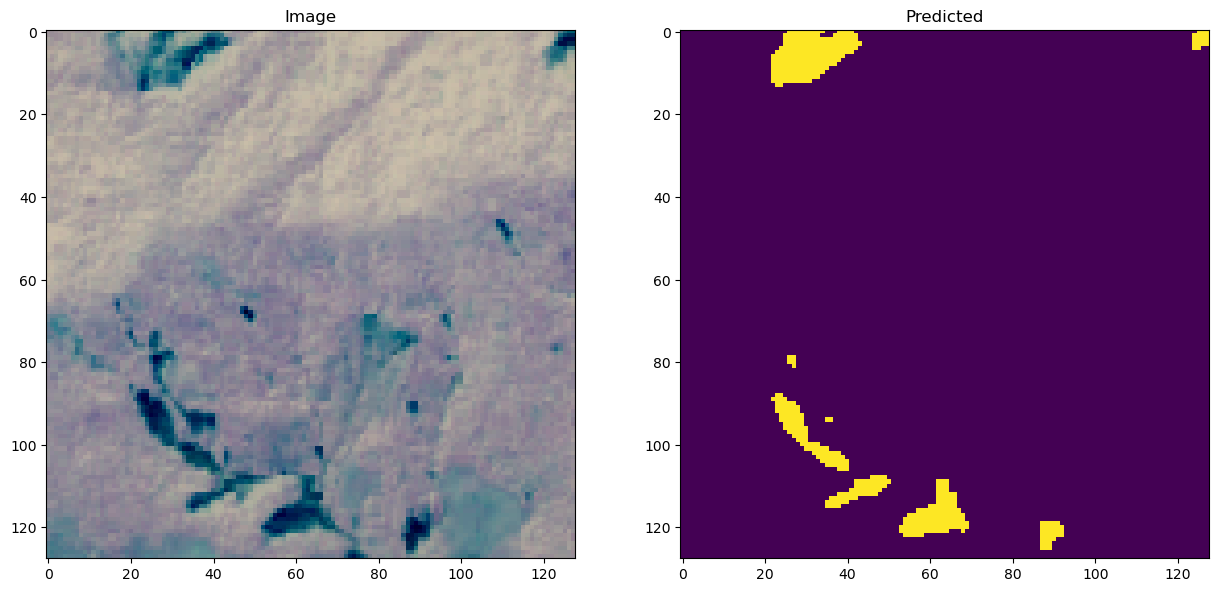

In [29]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(VAL_XX[img, :, :, 0:3])
ax1.set_title('Image')
ax2.imshow(pred_img[img, :, :, 0])
ax2.set_title("Predicted")